In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

In [2]:
#IMPORTING THE DATA 
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
X = cdc_diabetes_health_indicators.data.features 
y = cdc_diabetes_health_indicators.data.targets 
  
# metadata 
print(cdc_diabetes_health_indicators.metadata) 
  
# variable information 
print(cdc_diabetes_health_indicators.variables) 

{'uci_id': 891, 'name': 'CDC Diabetes Health Indicators', 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators', 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv', 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular', 'Multivariate'], 'num_instances': 253680, 'num_features': 21, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Sex', 'Age', 'Education Level', 'Income'], 'target_col': ['Diabetes_binary'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_

In [3]:
df = pd.DataFrame(X)

In [4]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [5]:
df['Diabetes_binary'] = y 

In [6]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [7]:
df.isnull().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [8]:
df.isna().sum()

HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
Diabetes_binary         0
dtype: int64

In [9]:
df

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,1,1,1,40,1,0,0,0,0,1,...,0,5,18,15,1,0,9,4,3,0
1,0,0,0,25,1,0,0,1,0,0,...,1,3,0,0,0,0,7,6,1,0
2,1,1,1,28,0,0,0,0,1,0,...,1,5,30,30,1,0,9,4,8,0
3,1,0,1,27,0,0,0,1,1,1,...,0,2,0,0,0,0,11,3,6,0
4,1,1,1,24,0,0,0,1,1,1,...,0,2,3,0,0,0,11,5,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,1,1,45,0,0,0,0,1,1,...,0,3,0,5,0,1,5,6,7,0
253676,1,1,1,18,0,0,0,0,0,0,...,0,4,0,0,1,0,11,2,4,1
253677,0,0,1,28,0,0,0,1,1,0,...,0,1,0,0,0,0,2,5,2,0
253678,1,0,1,23,0,0,0,0,1,1,...,0,3,0,0,0,1,7,5,1,0


In [10]:
df.shape

(253680, 22)

In [11]:
#Without cleaning the data
#WITHOUT TARGET VARIBALE 
df.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875,0.139333
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148,0.346294
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [12]:
#removing the duplicate rows in the data
df.drop_duplicates(keep=False,inplace=True)

In [13]:
df.shape

(218105, 22)

In [14]:
#DROPPING TARGET VARIABLE TO TEST MULTICOLINEARITY 
df2= df.drop("Diabetes_binary", axis=1)

In [15]:
df2.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

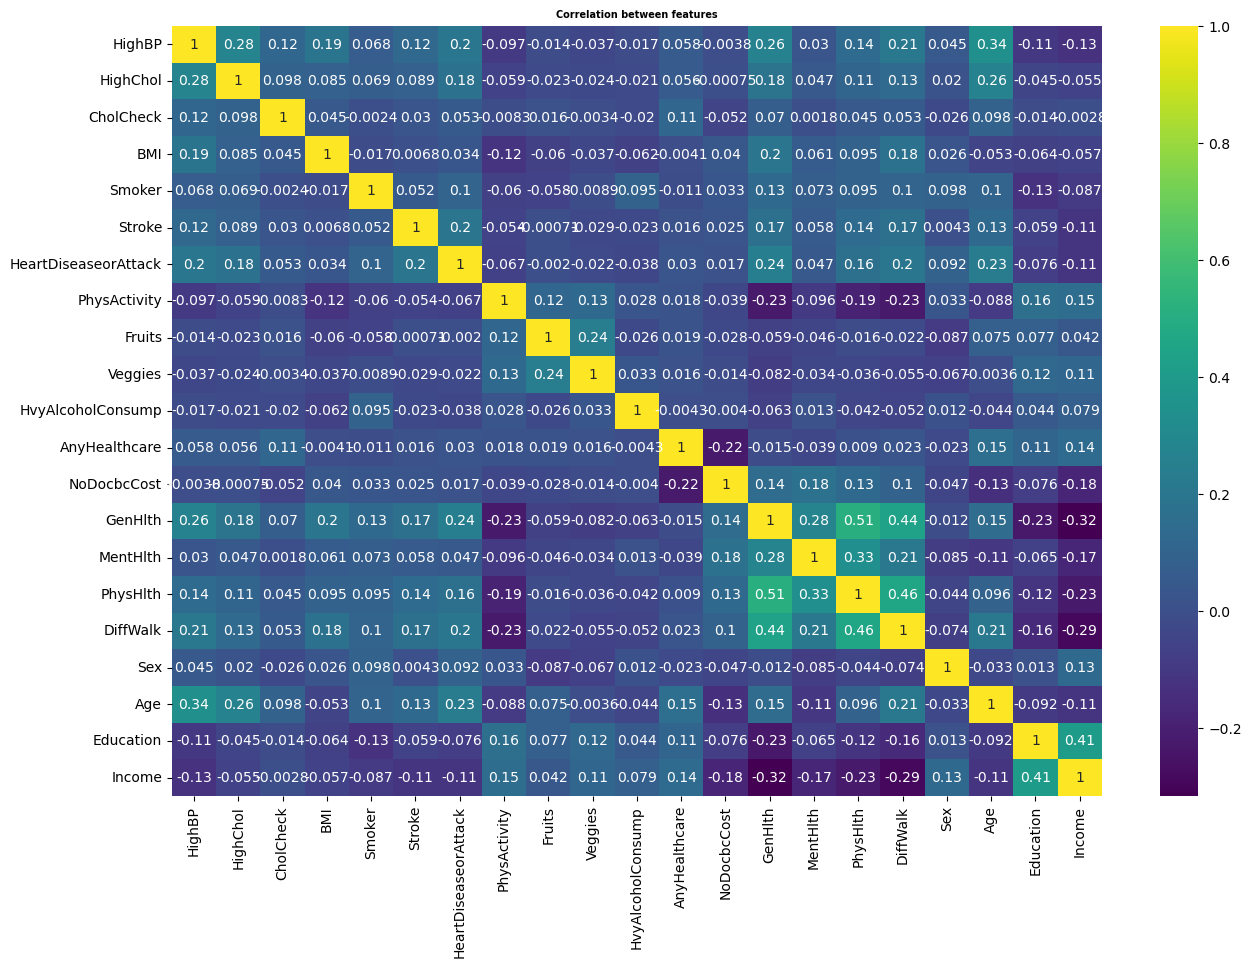

In [16]:
# correlation heat map WITHOUT TARGET 

df_corr=df2.corr()
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=7)
plt.show()

#note PhysHlth and GenHlth have high correlation of 0.51 
#Diffwalk and GenHlth have relatively high correlation at 0.44
#DiffWalk and PhysHlth have relatively high correlation at 0.46

In [17]:
#checking VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = df2

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0                 HighBP   2.379213
1               HighChol   2.082392
2              CholCheck  20.745124
3                    BMI  16.961153
4                 Smoker   2.008910
5                 Stroke   1.128978
6   HeartDiseaseorAttack   1.300857
7           PhysActivity   3.922058
8                 Fruits   2.750477
9                Veggies   5.053863
10     HvyAlcoholConsump   1.095813
11         AnyHealthcare  18.065583
12           NoDocbcCost   1.220734
13               GenHlth  11.064550
14              MentHlth   1.473482
15              PhysHlth   2.018970
16              DiffWalk   1.856360
17                   Sex   1.896595
18                   Age   9.701020
19             Education  26.070690
20                Income  11.929838


In [18]:
df2= df2.drop("Education", axis=1)

In [19]:
# the independent variables set
X = df2

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0                 HighBP   2.366326
1               HighChol   2.081900
2              CholCheck  19.931792
3                    BMI  16.247014
4                 Smoker   2.006075
5                 Stroke   1.128954
6   HeartDiseaseorAttack   1.300041
7           PhysActivity   3.822084
8                 Fruits   2.738790
9                Veggies   4.978728
10     HvyAlcoholConsump   1.094605
11         AnyHealthcare  17.241328
12           NoDocbcCost   1.210890
13               GenHlth  11.043732
14              MentHlth   1.468898
15              PhysHlth   2.018969
16              DiffWalk   1.854936
17                   Sex   1.895627
18                   Age   9.589179
19                Income   9.727112


In [20]:
df2= df2.drop("CholCheck", axis=1)

In [21]:
# the independent variables set
X = df2

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0                 HighBP   2.366306
1               HighChol   2.080109
2                    BMI  14.936300
3                 Smoker   2.004089
4                 Stroke   1.128933
5   HeartDiseaseorAttack   1.299515
6           PhysActivity   3.768229
7                 Fruits   2.731316
8                Veggies   4.953836
9      HvyAlcoholConsump   1.094490
10         AnyHealthcare  15.875938
11           NoDocbcCost   1.206953
12               GenHlth  10.707708
13              MentHlth   1.467297
14              PhysHlth   2.018046
15              DiffWalk   1.853284
16                   Sex   1.895313
17                   Age   9.247294
18                Income   9.436814


In [22]:
df2= df2.drop("AnyHealthcare", axis=1)

In [23]:
# the independent variables set
X = df2

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0                 HighBP   2.362959
1               HighChol   2.080098
2                    BMI  13.633445
3                 Smoker   2.001610
4                 Stroke   1.128833
5   HeartDiseaseorAttack   1.298693
6           PhysActivity   3.697787
7                 Fruits   2.727252
8                Veggies   4.924086
9      HvyAlcoholConsump   1.094288
10           NoDocbcCost   1.188610
11               GenHlth  10.441017
12              MentHlth   1.463326
13              PhysHlth   2.018033
14              DiffWalk   1.853281
15                   Sex   1.895192
16                   Age   8.400961
17                Income   8.372749


In [24]:
df2= df2.drop("BMI", axis=1)

In [25]:
# the independent variables set
X = df2

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature       VIF
0                 HighBP  2.332655
1               HighChol  2.078516
2                 Smoker  2.000434
3                 Stroke  1.127382
4   HeartDiseaseorAttack  1.290965
5           PhysActivity  3.648779
6                 Fruits  2.723776
7                Veggies  4.832055
8      HvyAlcoholConsump  1.093242
9            NoDocbcCost  1.179390
10               GenHlth  8.625773
11              MentHlth  1.458133
12              PhysHlth  2.001681
13              DiffWalk  1.837456
14                   Sex  1.881523
15                   Age  8.203291
16                Income  7.073390


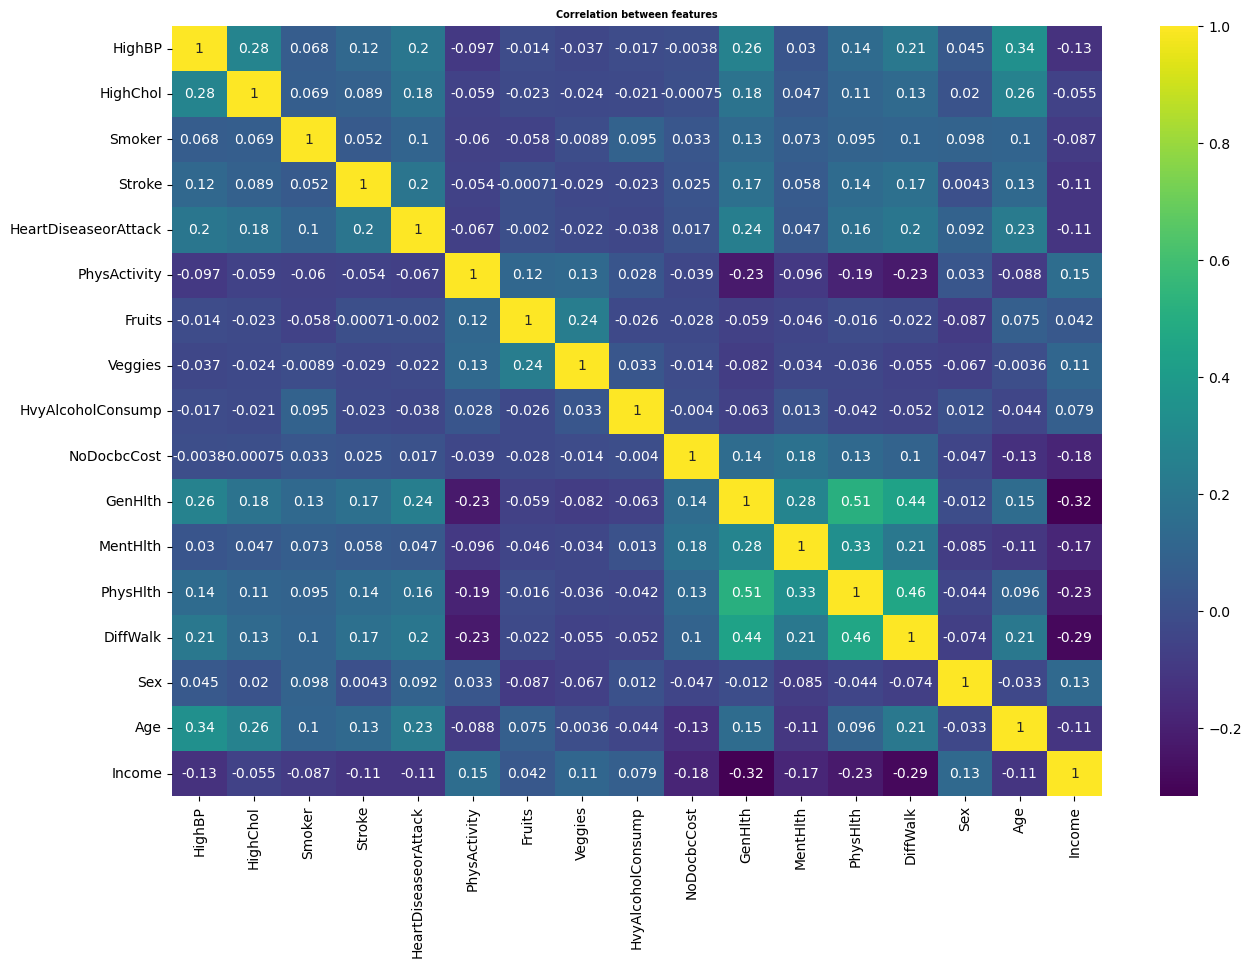

In [26]:
#rerunning correlation after checking VIF 
# correlation heat map 

df_corr=df2.corr()
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=7)
plt.show()


In [27]:
df2= df2.drop("PhysHlth", axis=1)

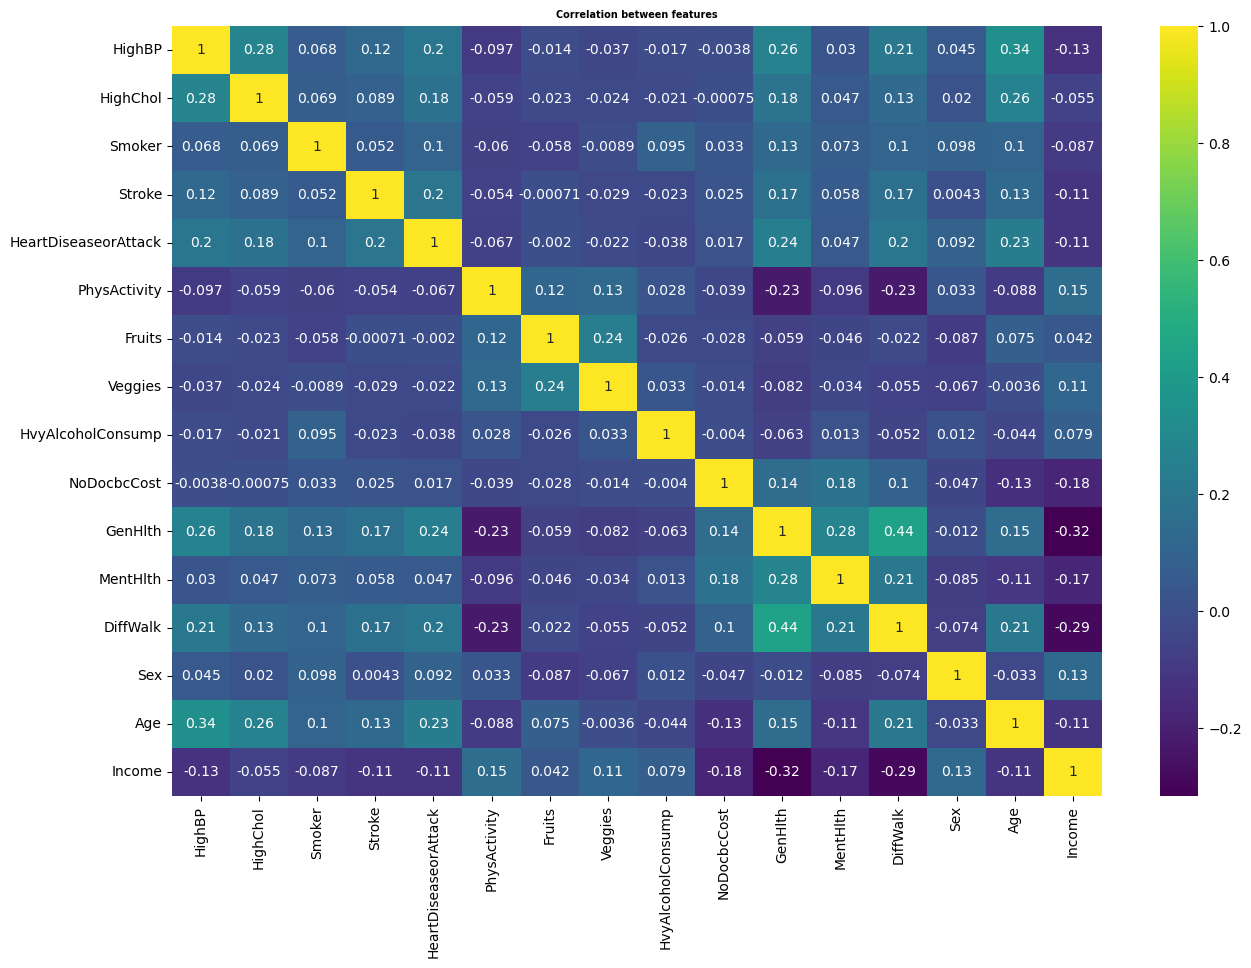

In [28]:
#rerunning correlation after checking VIF and dropping PhysHlth
# correlation heat map 

df_corr=df2.corr()
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=7)
plt.show()

#still have high correlation between GenHlth and DiffWalk

In [29]:
df2= df2.drop("DiffWalk", axis=1)

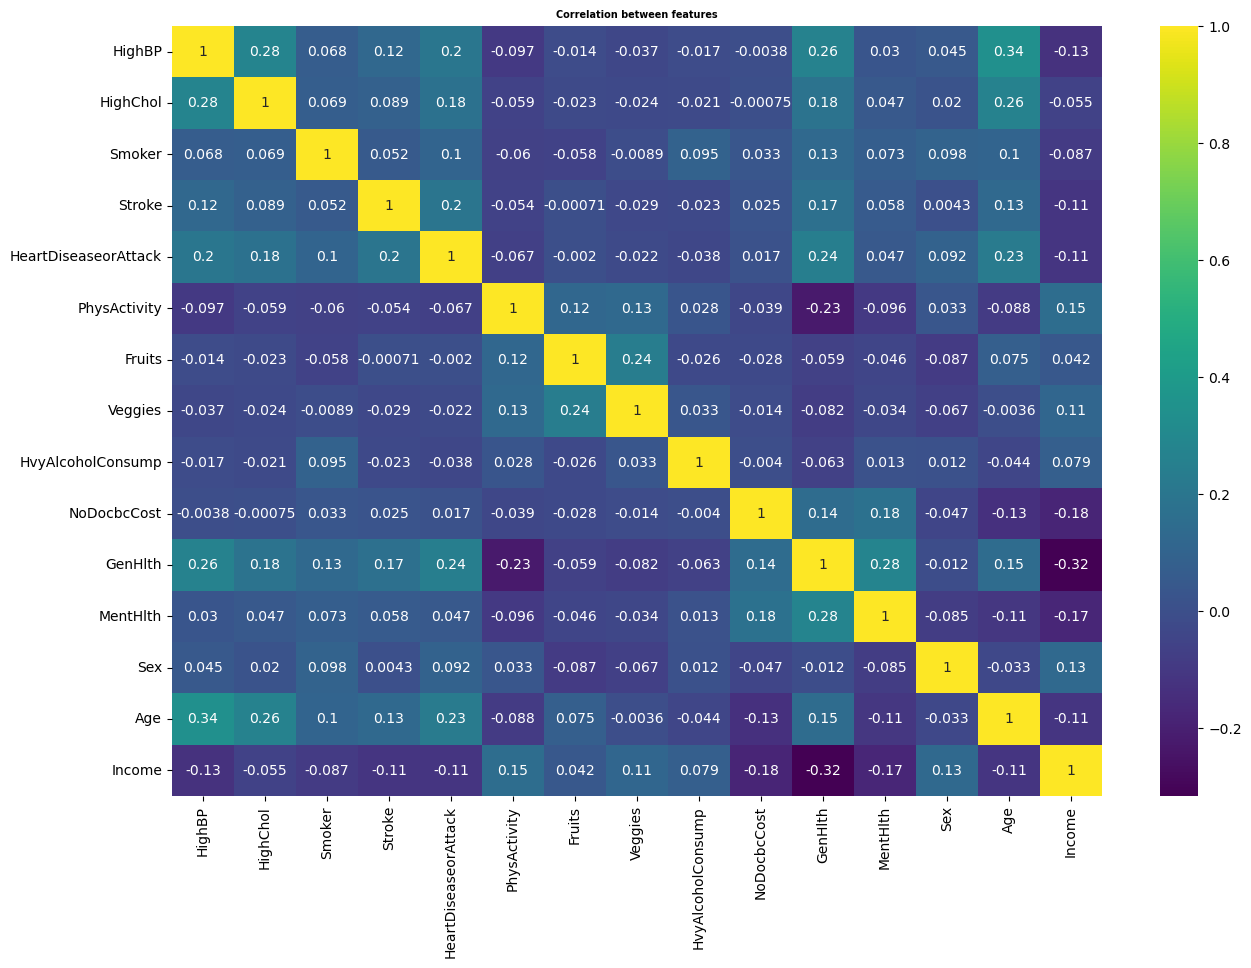

In [30]:
#rerunning correlation after checking VIF and dropping PhysHlth
# correlation heat map 

df_corr=df2.corr()
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df_corr,cmap='viridis',annot=True)
plt.title("Correlation between features",weight='bold',fontsize=7)
plt.show()
#all correlations are low (highest correlation is 0.34)

In [31]:
df2.describe()

,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,GenHlth,MentHlth,Sex,Age,Income
count,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000,218105.000000
mean,0.464235,0.447922,0.474102,0.047115,0.108003,0.721258,0.603833,0.786479,0.062841,0.097632,2.642727,3.683240,0.437734,8.097696,5.811554
std,0.498720,0.497282,0.499330,0.211885,0.310385,0.448381,0.489101,0.409793,0.242678,0.296817,1.065650,7.873062,0.496109,3.108408,2.104496
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,6.000000,4.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,8.000000,6.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.000000,1.000000,10.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,1.000000,13.000000,8.000000


In [32]:
# to get number of unique values in any column 
for i in range(len(df2.columns)):
    print(df.columns[i], ":")
    print("nunique:", df2[df2.columns[i]].nunique())
    print("nunique:", df2[df2.columns[i]].value_counts())

HighBP :
nunique: 2
nunique: 0    116853
1    101252
Name: HighBP, dtype: int64
HighChol :
nunique: 2
nunique: 0    120411
1     97694
Name: HighChol, dtype: int64
CholCheck :
nunique: 2
nunique: 0    114701
1    103404
Name: Smoker, dtype: int64
BMI :
nunique: 2
nunique: 0    207829
1     10276
Name: Stroke, dtype: int64
Smoker :
nunique: 2
nunique: 0    194549
1     23556
Name: HeartDiseaseorAttack, dtype: int64
Stroke :
nunique: 2
nunique: 1    157310
0     60795
Name: PhysActivity, dtype: int64
HeartDiseaseorAttack :
nunique: 2
nunique: 1    131699
0     86406
Name: Fruits, dtype: int64
PhysActivity :
nunique: 2
nunique: 1    171535
0     46570
Name: Veggies, dtype: int64
Fruits :
nunique: 2
nunique: 0    204399
1     13706
Name: HvyAlcoholConsump, dtype: int64
Veggies :
nunique: 2
nunique: 0    196811
1     21294
Name: NoDocbcCost, dtype: int64
HvyAlcoholConsump :
nunique: 5
nunique: 3    71971
2    71485
4    31520
1    31054
5    12075
Name: GenHlth, dtype: int64
AnyHealthcare :

<Axes: >

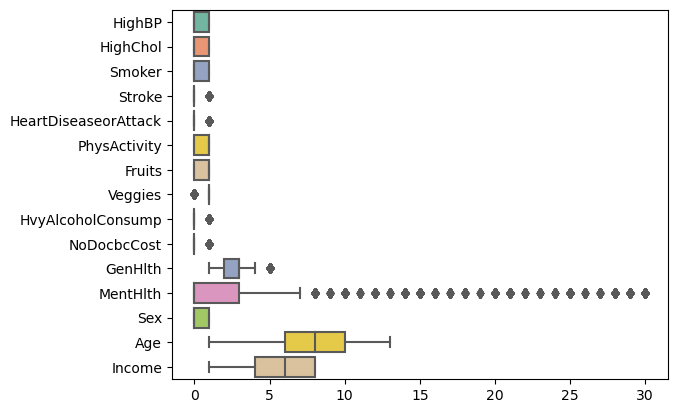

In [33]:
#VISUALIZATIONS 
import seaborn as sns
sns.boxplot(data=df2,orient='h',palette='Set2')

In [34]:
#Counting the Number of 0's in MenHlth 
#MenHlth is supposed to be on a scale of 1-5
zero_count = (df2['MentHlth'] == 0).sum()
print(zero_count)

141627


In [35]:
# Binning Mental Health
#starting at 1 to exclude any 0's 
bins = [1, 6, 11, 16, 21, 26, 31]
labels = ['1-5', '6-10', '11-15', '16-20', '21-25', '26-30']

# Use pd.cut to bin the values into intervals
df2['Mental_Hlth_BIN'] = pd.cut(df['MentHlth'], bins=bins, labels=labels, include_lowest=True)

# Check the frequency of each bin
df2['Mental_Hlth_BIN'].value_counts()

1-5      41348
26-30    12634
6-10     10184
11-15     7191
16-20     3754
21-25     1367
Name: Mental_Hlth_BIN, dtype: int64

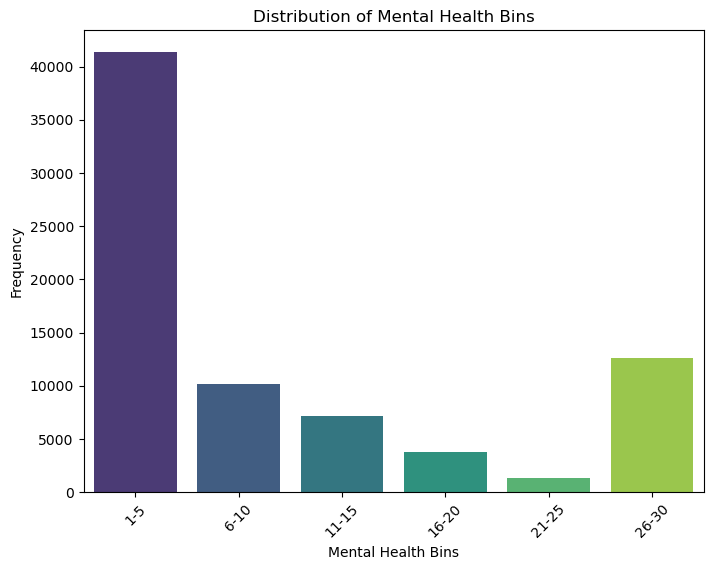

In [36]:
#Plotting Binned Mental Health
# Plot the binned Mental Health data
plt.figure(figsize=(8, 6))
sns.countplot(data=df2, x='Mental_Hlth_BIN', palette='viridis')

# Add labels and title
plt.xlabel('Mental Health Bins')
plt.ylabel('Frequency')
plt.title('Distribution of Mental Health Bins')

# Rotate the x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [37]:
#Ordering and Renanming Age Variable 
age_mapping = {
    1: '18-24',
    2: '25-29',
    3: '30-34',
    4: '35-39',
    5: '40-44',
    6: '45-49',
    7: '50-54',
    8: '55-59',
    9: '60-64',
    10: '65-69',
    11: '70-74',
    12: '75-79',
    13: '80+'
}

# Assuming the Age variable is called 'Age_Group' in your DataFrame
df2['Age'] = df2['Age'].replace(age_mapping)

age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
df2['Age'] = pd.Categorical(df2['Age'], categories=age_order, ordered=True)

# Check the updated Age variable
print(df2[['Age']].head())

     Age
0  60-64
1  50-54
2  60-64
3  70-74
4  70-74


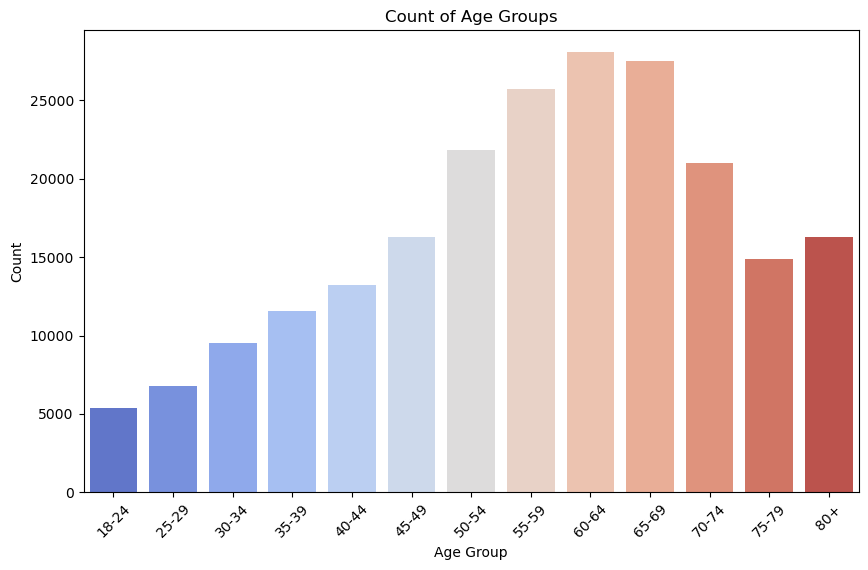

In [38]:
# Bar Chart of Age 
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Age', palette='coolwarm')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Count of Age Groups')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [299]:
# Assuming your DataFrame is named df and has 'Age' and 'Diabetes_binary' columns

# Create the histogram using Seaborn
plt.figure(figsize=(10, 7))
sns.histplot(data=df2, x='Age', hue='Diabetes_binary', multiple='stack', bins=20, palette=['blue', 'red'])

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Diabetes Binary')
plt.title('Histogram of BMI Age Diabetes Status')

# Show the plot
plt.show()

ValueError: Could not interpret value `Diabetes_binary` for parameter `hue`

<Figure size 1000x700 with 0 Axes>

In [39]:
# Renaming and Ordering Income variable
income_mapping = {
    1: 'Less than $10,000',
    2: '$10,000 - $14,999',
    3: '$15,000 - $19,999',
    4: '$20,000 - $24,999',
    5: '$25,000 - $34,999',
    6: '$35,000 - $49,999',
    7: '$50,000 - $74,999',
    8: '$75,000 or more'
}

# Replace numerical income with the income ranges
df2['Income'] = df2['Income'].replace(income_mapping)

# Convert the Income column into a categorical variable with a specific order
income_order = ['Less than $10,000', '$10,000 - $14,999', '$15,000 - $19,999', 
                '$20,000 - $24,999', '$25,000 - $34,999', '$35,000 - $49,999', 
                '$50,000 - $74,999', '$75,000 or more']

df2['Income'] = pd.Categorical(df2['Income'], categories=income_order, ordered=True)

# Check the updated Income variable
print(df2[['Income']].head())

              Income
0  $15,000 - $19,999
1  Less than $10,000
2    $75,000 or more
3  $35,000 - $49,999
4  $20,000 - $24,999


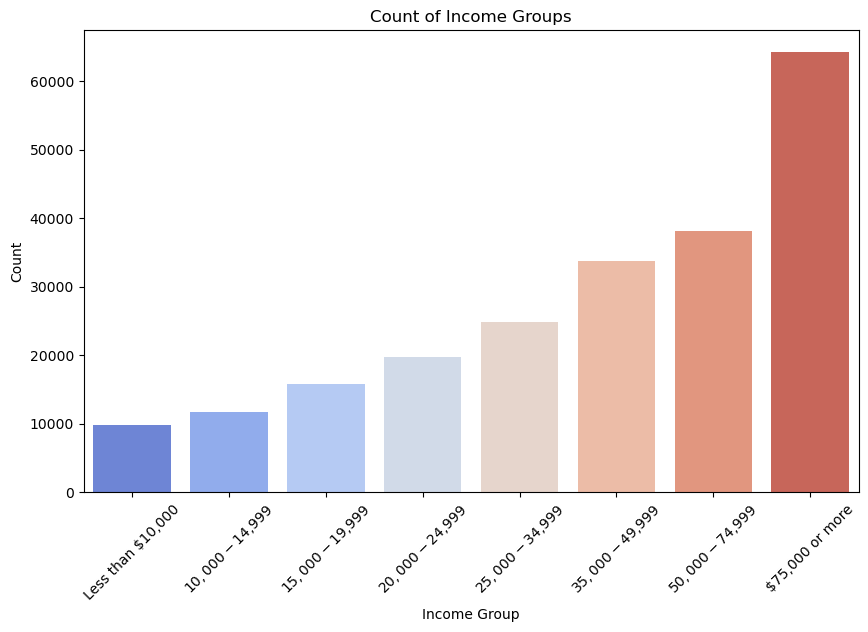

In [40]:
# Bar Chart for Income
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='Income', palette='coolwarm')

# Add labels and title
plt.xlabel('Income Group')
plt.ylabel('Count')
plt.title('Count of Income Groups')

# Rotate x-axis labels if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [41]:
df2.columns

Index(['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartDiseaseorAttack',
       'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost',
       'GenHlth', 'MentHlth', 'Sex', 'Age', 'Income', 'Mental_Hlth_BIN'],
      dtype='object')

In [42]:
df.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'Diabetes_binary'],
      dtype='object')

In [75]:
#Logistic Regression 
#HOMEWORK 3 START 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# remove categorical variables and target variables
X = df.drop(['Education', 'CholCheck', 'AnyHealthcare','BMI','PhysHlth','DiffWalk','Diabetes_binary'] ,axis= 1)

y = df['Diabetes_binary'] 

#Splitting the data into test and training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver = 'saga', random_state = 67, max_iter=2000)

logistic.fit(X_train, y_train)

predictions = logistic.predict(X_test)

errors = abs(predictions - y_test)

print('Accuracy:', 1 - round(np.mean(errors), 4))
print(logistic.score(X_test, y_test))

print('There are ', np.sum(logistic.coef_==0), ' coeficients with value 0')
print(' ')
print(logistic.coef_)

Accuracy: 0.8388
0.8387639075681623
There are  0  coeficients with value 0
 
[[ 0.89388168  0.58366645 -0.06905206  0.08557549  0.20837653 -0.10702208
  -0.06138713  0.00856101 -0.96466412 -0.04960298  0.51300339 -0.00471644
   0.22874593  0.09142262 -0.04214328]]


In [45]:
log_reg= LogisticRegression(solver = 'saga', random_state = 67, penalty='l1', max_iter=200)

log_reg.fit(X_train, y_train)

predictions = log_reg.predict(X_test)

errors = abs(predictions - y_test)

print('Accuracy:', 1 - round(np.mean(errors), 4))
print(log_reg.score(X_test, y_test))


print('There are ', np.sum(log_reg.coef_==0), ' coeficients with value 0')
print(' ')
print(log_reg.coef_)


Accuracy: 0.8388
0.838779190610099
There are  0  coeficients with value 0
 
[[ 0.89392384  0.58358266 -0.06875244  0.08486174  0.20814622 -0.10676818
  -0.06109633  0.00810191 -0.9646308  -0.04893624  0.5130111  -0.00471702
   0.22853314  0.09143677 -0.04211162]]


In [46]:
import statsmodels.api as sm
X = sm.add_constant(X)
logit = sm.Logit(y, X)


# fit the model
model = logit.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.370265
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Diabetes_binary   No. Observations:               218105
Model:                          Logit   Df Residuals:                   218089
Method:                           MLE   Df Model:                           15
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:                  0.1574
Time:                        19:17:08   Log-Likelihood:                -80757.
converged:                       True   LL-Null:                       -95845.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.4929      0.043   -105.344      0.000      -4.576      -4.409
HighBP                   0.8912      0.015     61.299      0.000       0.863       0.920
HighChol                 0.5881      0.013     43.616      0.000       0.562       0.614
Smoker                  -0.0708      0.013     -5.435      0.000      -0.096      -0.045
Stroke                   0.0810      0.024      3.309      0.001       0.033       0.129
HeartDiseaseorAttack     0.2023      0.017     11.564      0.000       0.168       0.237
PhysActivity            -0.0990      0.014     -7.136      0.000      -0.126      -0.072
Fruits                  -0.0436      0.013     -3.235      0.001      -0.070      -0.017
Veggies                 -0.0030      0.016     -0.195      0.845      -0.033       0.027
HvyAlcoholConsump       -0.9259      0.038    -24.417      0.000      -1.000      -0.852
NoDocbcCost             -0.0446      0.022     -2.040      0.041      -0.087      -0.002
GenHlth                  0.5188      0.007     74.120      0.000       0.505       0.533
MentHlth                -0.0053      0.001     -6.643      0.000      -0.007      -0.004
Sex                      0.2310      0.013     17.403      0.000       0.205       0.257
Age                      0.0887      0.003     34.374      0.000       0.084       0.094
Income                  -0.0420      0.003    -13.118      0.000      -0.048      -0.036
========================================================================================
"""

In [47]:
odds_ratios = np.exp(model.params)
print(odds_ratios)

const                   0.011189
HighBP                  2.438159
HighChol                1.800495
Smoker                  0.931655
Stroke                  1.084378
HeartDiseaseorAttack    1.224205
PhysActivity            0.905781
Fruits                  0.957320
Veggies                 0.996972
HvyAlcoholConsump       0.396186
NoDocbcCost             0.956412
GenHlth                 1.680015
MentHlth                0.994673
Sex                     1.259884
Age                     1.092779
Income                  0.958829
dtype: float64


In [60]:
#Training Accuracy of Logistic Regression 
import statsmodels.api as sm

# Add a column of ones to X_train for the intercept term
X_train_with_intercept = sm.add_constant(X_train)

# Fit the logistic regression model
logit = sm.Logit(y_train, X_train_with_intercept)
model = logit.fit()

# Predict on the training set
yhat = model.predict(X_train_with_intercept)

1-abs(np.round(yhat)-y).mean()

Optimization terminated successfully.
         Current function value: 0.370341
         Iterations 7


0.8393560092485246

In [63]:
#Test Accuracy of Logistic Regression 
import statsmodels.api as sm

# Add a column of ones to X_train for the intercept term
X_test_with_intercept = sm.add_constant(X_test)

# Fit the logistic regression model
logit = sm.Logit(y_train, X_train_with_intercept)
model = logit.fit()


yhat = model.predict(X_test_with_intercept)
1-abs(np.round(yhat)-y_test).mean()

Optimization terminated successfully.
         Current function value: 0.370341
         Iterations 7


0.8387639075681623

[Text(0.5, 0.875, 'HighBP <= 0.5\ngini = 0.269\nsamples = 218105\nvalue = [183238, 34867]'),
 Text(0.25, 0.625, 'GenHlth <= 2.5\ngini = 0.137\nsamples = 116853\nvalue = [108210, 8643]'),
 Text(0.125, 0.375, 'Age <= 9.5\ngini = 0.069\nsamples = 67465\nvalue = [65037, 2428]'),
 Text(0.0625, 0.125, 'gini = 0.049\nsamples = 51550\nvalue = [50262, 1288]'),
 Text(0.1875, 0.125, 'gini = 0.133\nsamples = 15915\nvalue = [14775, 1140]'),
 Text(0.375, 0.375, 'Age <= 6.5\ngini = 0.22\nsamples = 49388\nvalue = [43173, 6215]'),
 Text(0.3125, 0.125, 'gini = 0.128\nsamples = 18644\nvalue = [17367, 1277]'),
 Text(0.4375, 0.125, 'gini = 0.27\nsamples = 30744\nvalue = [25806, 4938]'),
 Text(0.75, 0.625, 'GenHlth <= 3.5\ngini = 0.384\nsamples = 101252\nvalue = [75028, 26224]'),
 Text(0.625, 0.375, 'GenHlth <= 2.5\ngini = 0.322\nsamples = 72381\nvalue = [57761, 14620]'),
 Text(0.5625, 0.125, 'gini = 0.24\nsamples = 35074\nvalue = [30184, 4890]'),
 Text(0.6875, 0.125, 'gini = 0.386\nsamples = 37307\nvalue =

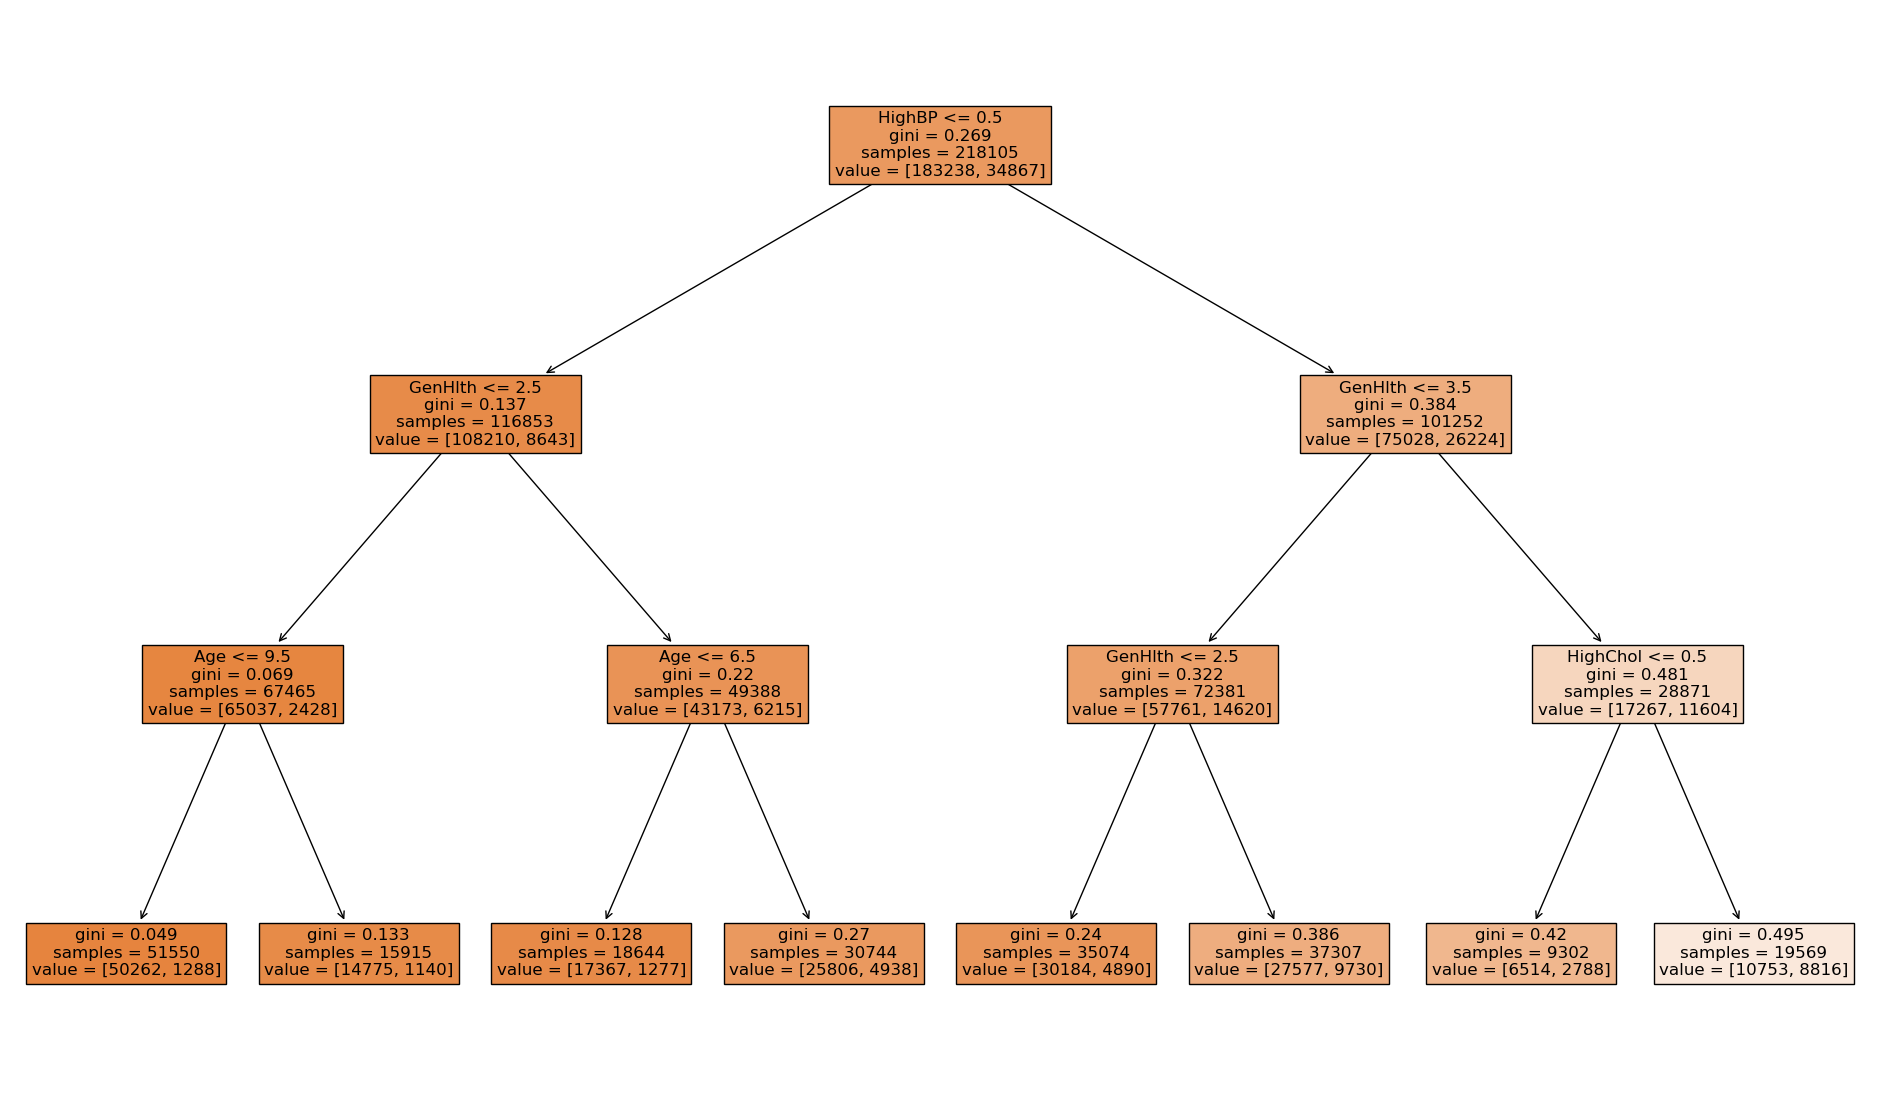

In [80]:
#Decision Trees with Max Depth 
!pip install CHAID
!pip install CHAID[graph]
from sklearn import tree
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


clf = tree.DecisionTreeClassifier(max_depth=3) 
clf = clf.fit(X, y)

fig, ax = plt.subplots(figsize=(24, 14))
tree.plot_tree(clf, filled=True, fontsize=12, feature_names=X.columns) 

In [84]:
decisiontree_importances= clf.feature_importances_
columns= X_train.columns
decisiontree_cof= pd.Series(decisiontree_importances, columns)
decisiontree_cof

HighBP                  0.538774
HighChol                0.041586
Smoker                  0.000000
Stroke                  0.000000
HeartDiseaseorAttack    0.000000
PhysActivity            0.000000
Fruits                  0.000000
Veggies                 0.000000
HvyAlcoholConsump       0.000000
NoDocbcCost             0.000000
GenHlth                 0.383392
MentHlth                0.000000
Sex                     0.000000
Age                     0.036248
Income                  0.000000
dtype: float64

<Axes: >

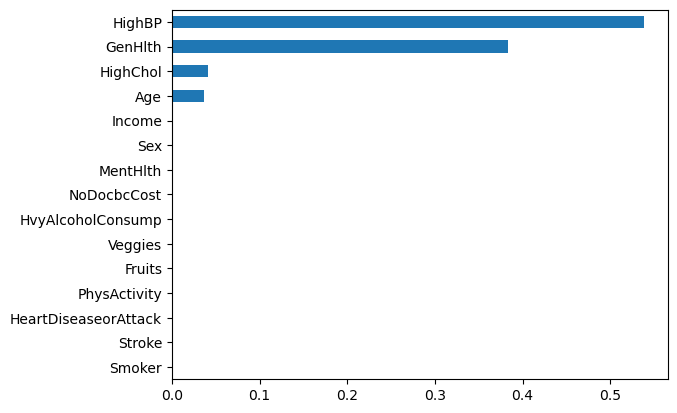

In [85]:
%matplotlib inline

decisiontree_cof.sort_values().plot.barh()

In [52]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 1000, criterion = 'entropy', min_samples_leaf = 3, max_depth= 6, random_state = 67)

forest.fit(X_train, y_train)

preds = forest.predict(X_train)
predictions = forest.predict(X_test)

errs = abs(preds - y_train)
errors = abs(predictions - y_test)

print('Train Accuracy:', 1 - round(np.mean(errs), 4))
print('Test Accuracy:', 1 - round(np.mean(errors), 4))

Train Accuracy: 0.84
Test Accuracy: 0.8406


In [55]:
forest.feature_importances_
importance= forest.feature_importances_

In [56]:
X_train.head()
columns= X_train.columns

In [57]:
rfc_cof= pd.Series(importance, columns)
rfc_cof

HighBP                  0.288243
HighChol                0.135430
Smoker                  0.001279
Stroke                  0.010082
HeartDiseaseorAttack    0.059616
PhysActivity            0.015167
Fruits                  0.000679
Veggies                 0.000908
HvyAlcoholConsump       0.020725
NoDocbcCost             0.000889
GenHlth                 0.282786
MentHlth                0.007991
Sex                     0.006057
Age                     0.136125
Income                  0.034021
dtype: float64

<Axes: >

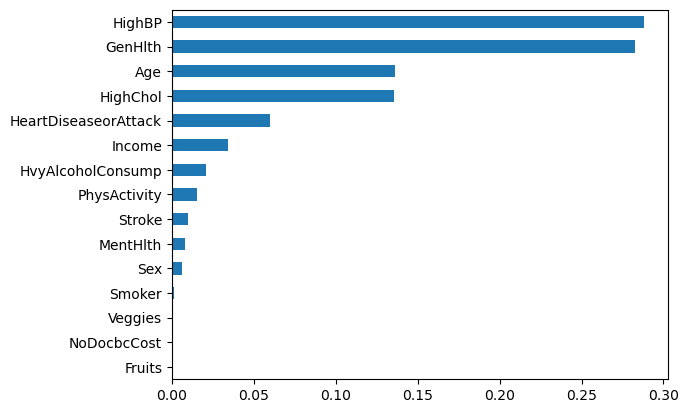

In [58]:
%matplotlib inline

rfc_cof.sort_values().plot.barh()

In [8]:
#Model Assesment 
from joblib import Memory
from sklearn.datasets import load_svmlight_file
from scipy.sparse import csc_matrix
from scipy.special import expit
from scipy import sparse
from sklearn.preprocessing import normalize
import numpy as np
import pandas as pd
from copy import copy
from sklearn import svm
import time


from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(solver = 'saga', penalty='l1', random_state = 67, max_iter=1000)

logistic.fit(X_train, y_train)

test_log = logistic.predict_proba(X_test)

print('Train Accuracy:', logistic.score(X_train, y_train))
print('Test Accuracy:', logistic.score(X_test, y_test))

Train Accuracy: 0.839323259515435
Test Accuracy: 0.838779190610099


In [66]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver='sgd', learning_rate_init=0.003, hidden_layer_sizes=(3, 3), max_iter=1000 )

mlp.fit(X_train, y_train)

test_mlp = mlp.predict_proba(X_test)

print('Train Accuracy ', mlp.score(X_train, y_train))
print('Test Accuracy ', mlp.score(X_test, y_test))


Train Accuracy  0.8399651542839925
Test Accuracy  0.8405367404328158


In [69]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators as needed
rf.fit(X_train, y_train)
test_rf = rf.predict_proba(X_test)

# Print training and testing accuracy
print('Random Forest Train Accuracy: ', rf.score(X_train, y_train))
print('Random Forest Test Accuracy: ', rf.score(X_test, y_test))

Random Forest Train Accuracy:  0.9335769913475205
Random Forest Test Accuracy:  0.8206229367893385


In [15]:
X_train.size

2663640

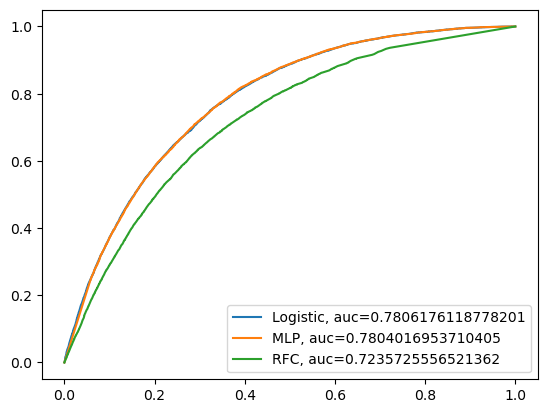

In [72]:

from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

fpr, tpr, thresh = metrics.roc_curve(y_test, test_log[:,1])
auc = metrics.roc_auc_score(y_test, test_log[:,1])
plt.plot(fpr,tpr,label="Logistic, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, test_mlp[:,1])
auc = metrics.roc_auc_score(y_test, test_mlp[:,1])
plt.plot(fpr,tpr,label="MLP, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, test_rf[:,1])
auc = metrics.roc_auc_score(y_test, test_rf[:,1])
plt.plot(fpr,tpr,label="RFC, auc="+str(auc))


plt.legend(loc=0)